## Домашнее задание №2 (курс "Практикум по программированию на языке Python")

### Выполнил: <font color='red'>Никитин Артем Анатольевич, МФТИ, ФПМИ</font>

### Тема: Основы анализа данных и машинного обучения

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   7 марта 2025

**Дедлайн**:   21:00 21 марта 2025

**Среда выполнения**: Jupyter Notebook (Python 3.10+)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.10). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту mel-lain@yandex.ru.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию. <font color='blue'>Для решения задач этой лабораторной работы запрещается использовать любые приложения/API для генерации кода на основе LLM.</font>

__Удалять фрагменты формулировок заданий запрещается.__

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-4 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребляемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

In [46]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import kagglehub
import re
import pandas as pd

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})
matplotlib.rcParams['figure.figsize'] = (16, 9)


def make_plot(xlabex: str, ylabel: str, title: str, legend: list[str] = None, **kwargs) -> tuple[plt.figure, plt.axis]:
    """
    Creates a plot with parameters

    :param xlabex: x-axis label
    :param ylabel: y-axis label
    :param title: plot title
    :param legend: plot legend
    """
    fig, ax = plt.subplots(**kwargs)
    ax.set_xlabel(xlabex)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    if legend:
        ax.legend(legend)

    return fig, ax

### ТЕСТЫ ВНИЗУ


__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [2]:
def task_1(arr: np.ndarray) -> bool:
    return np.all(arr > 0)

__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [3]:
def task_2(arr: np.ndarray, n: int) -> np.ndarray:
    return np.repeat(arr, n)

__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [4]:
def task_3(V: np.ndarray, v: np.ndarray) -> np.ndarray:
    bounds = np.concatenate(([0], np.cumsum(v))).astype(int)
    cumsum = np.concatenate(([0], np.cumsum(V)))
    return cumsum[bounds[1:]] - cumsum[bounds[:-1]]

__Задание 4 (1 балл):__ Для матрицы `X` и некоторого числа `v` вернуть ближайший к числу элемент матрицы. Пример: для `X = np.arange(0, 10).reshape((2, 5))` и `v = 3.6` ответом будет `4`.

In [5]:
def task_4(X: np.array, v: float) -> float:
    idx = np.unravel_index(np.argmin(np.abs(X - v)), X.shape)
    return X[idx]

### TESTING

In [6]:
import unittest


class Test(unittest.TestCase):
    def test_task_1(self):
        arr = np.array([1, 2, 3, 4])
        self.assertTrue(task_1(arr))

        arr = np.array([1, -2, 3, 4])
        self.assertFalse(task_1(arr))

        arr = np.array([1, 0, 3])
        self.assertFalse(task_1(arr))

        arr = np.array([])
        self.assertTrue(task_1(arr))

    def test_task_2(self):
        arr = np.array([1, 2, 3])
        expected = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3])
        np.testing.assert_array_equal(task_2(arr, 3), expected)

        arr = np.array([10])
        expected = np.array([10, 10, 10, 10])
        np.testing.assert_array_equal(task_2(arr, 4), expected)

        arr = np.array([])
        expected = np.array([])
        np.testing.assert_array_equal(task_2(arr, 5), expected)

        arr = np.array([1, 2, 3])
        expected = np.array([])
        np.testing.assert_array_equal(task_2(arr, 0), expected)

    def test_task_3(self):
        V = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        v = np.array([2, 1, 3])
        expected = np.array([3, 3, 15])
        np.testing.assert_array_equal(task_3(V, v), expected)

        V = np.array([5, 5, 5])
        v = np.array([3])
        expected = np.array([15])
        np.testing.assert_array_equal(task_3(V, v), expected)

        V = np.array([-1, -1, 1])
        v = np.array([1, 0])
        expected = np.array([-1, 0])
        np.testing.assert_array_equal(task_3(V, v), expected)

        V = np.array([1, 2, 3, 4, 5, 6])
        v = np.array([1, 2, 3])
        expected = np.array([1, 5, 15])
        np.testing.assert_array_equal(task_3(V, v), expected)

        V = np.array([1, 2, 3, 4])
        v = np.array([2, 0, 2])
        expected = np.array([3, 0, 7])
        np.testing.assert_array_equal(task_3(V, v), expected)

        V = np.array([1, 2, 3])
        v = np.array([])
        expected = np.array([])
        np.testing.assert_array_equal(task_3(V, v), expected)

    def test_task_4(self):
        X = np.arange(0, 10).reshape((2, 5))
        v = 3.6
        self.assertEqual(task_4(X, v), 4)

        X = np.array([[-5, -2, 0], [1, 3, 7]])
        v = -1.5
        self.assertEqual(task_4(X, v), -2)

        X = np.array([1, 2, 3, 4]).reshape((2, 2))
        v = 2.5
        self.assertEqual(task_4(X, v), 2)

        X = np.array([[42]])
        v = 100
        self.assertEqual(task_4(X, v), 42)


unittest.main(argv=[''], verbosity=2, exit=False)

test_task_1 (__main__.Test.test_task_1) ... ok
test_task_2 (__main__.Test.test_task_2) ... ok
test_task_3 (__main__.Test.test_task_3) ... ok
test_task_4 (__main__.Test.test_task_4) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


__Задание 5 (1 балл):__ Используя следующую функцию для генерации выборки, отобразить на графике синим цветом функцию `y(x)`, а также ее доверительный интервал в виде закрашенной зеленым цветом области от `y[i] - error[i]` до `y[i] + error[i]`. Полезной может оказаться функция `fill_between`.

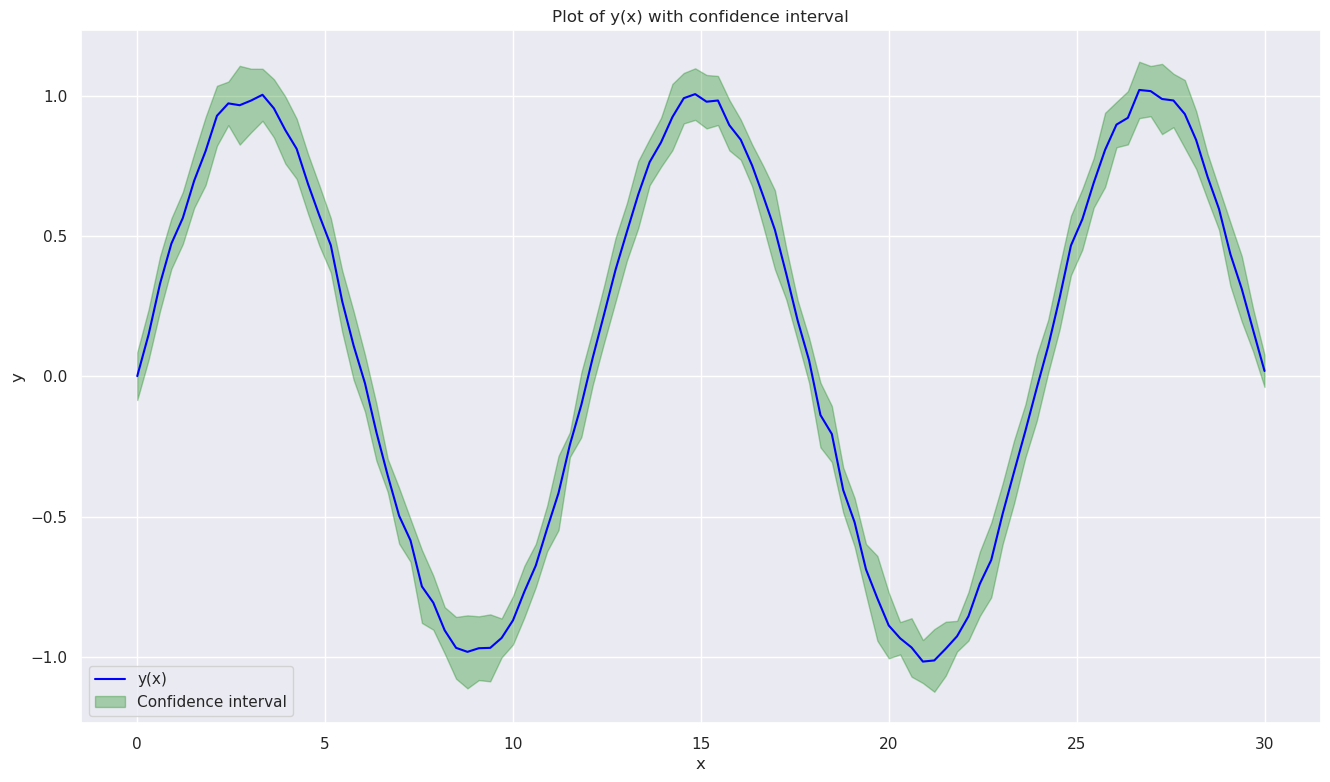

In [7]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x / 6 * np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error


def task_5():
    x, y, error = gen_uncertain_data()

    ax = make_plot('x', 'y', 'Plot of y(x) with confidence interval')[1]

    ax.plot(x, y, color='blue', label='y(x)')
    ax.fill_between(x, y - error, y + error, color='green', alpha=0.3, label='Confidence interval')
    ax.legend()
    plt.show()


task_5()

Для решения следующих заданий скачайте по [ссылке](https://www.kaggle.com/datasets/yasserh/titanic-dataset) набор данных Titanic и загрузите в DataFrame.

In [8]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")
df = pd.read_csv(path + "/Titanic-Dataset.csv", index_col=0)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


__Задание 6 (2 балла):__ Ответить на следующие вопросы, посчитав и выведя всю необходимую информацию на основе данных:
- какое распределение женщин/мужчин в нем?
- сколько пассажиров ехало каким классом?
- какой средний/минимальный/максимальный возраст пассажиров?
- что можно сказать о количестве выживших пассажиров?
- верно ли, что женщины выживали чаще мужчин?
- какие пассажиры выживали чаще: с более дешевыми или дорогими билетами?
- верно ли, что чаще выживали более молодые пассажиры?

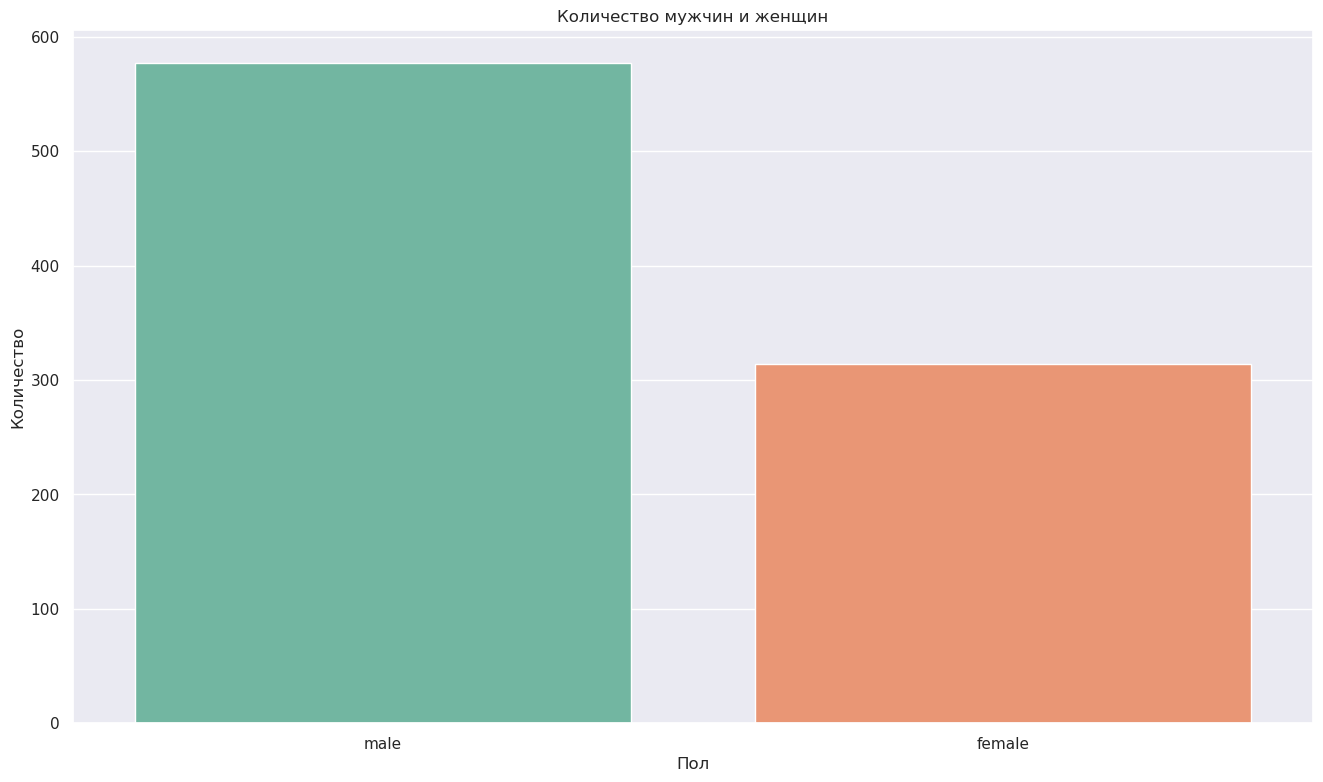

Male / Female: 1.84


In [9]:
ax = make_plot("Пол", "Количество", "Количество мужчин и женщин")[1]
sns.countplot(data=df, x='Sex', hue='Sex', ax=ax, palette='Set2')
plt.show()

print(f"Male / Female: {len(df[df['Sex'] == "male"]) / len(df[df['Sex'] == "female"]):.2f}")

- Мужчин больше чем женщин примерно в 1.84 раза

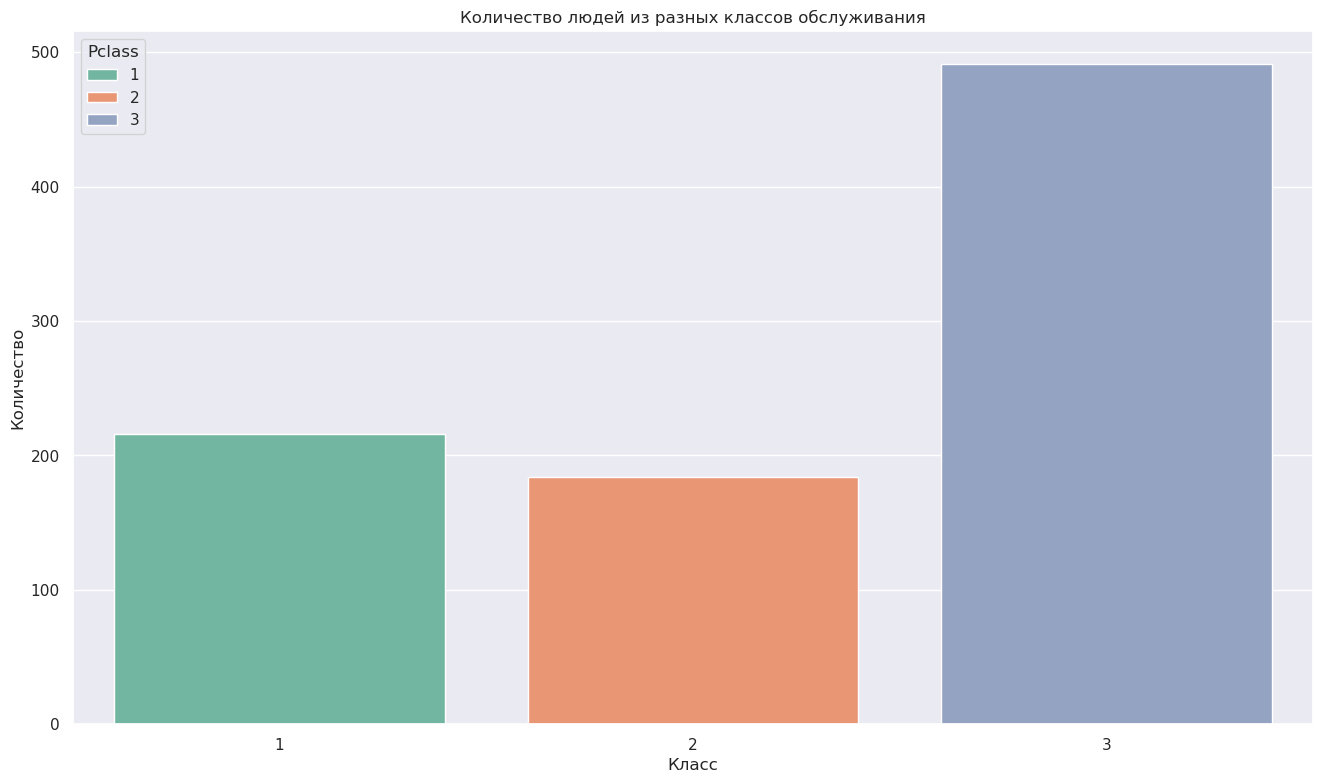

1 class: 216 passengers
2 class: 184 passengers
3 class: 491 passengers


In [10]:
ax = make_plot("Класс", "Количество", "Количество людей из разных классов обслуживания")[1]
sns.countplot(data=df, x='Pclass', hue='Pclass', ax=ax, palette='Set2')
plt.show()

classes = np.array(sorted(df['Pclass'].unique()))
for i in classes:
    print(f"{i} class: {len(df[df['Pclass'] == i])} passengers")

- Больше всего было пассажиров третьего класса, меньше - второго

In [11]:
print(f"Minimum age:  {df['Age'].min():.2f}")
print(f"Miaximum age: {df['Age'].max():.2f}")
print(f"Mean age:     {df['Age'].mean():.2f}")

Minimum age:  0.42
Miaximum age: 80.00
Mean age:     29.70


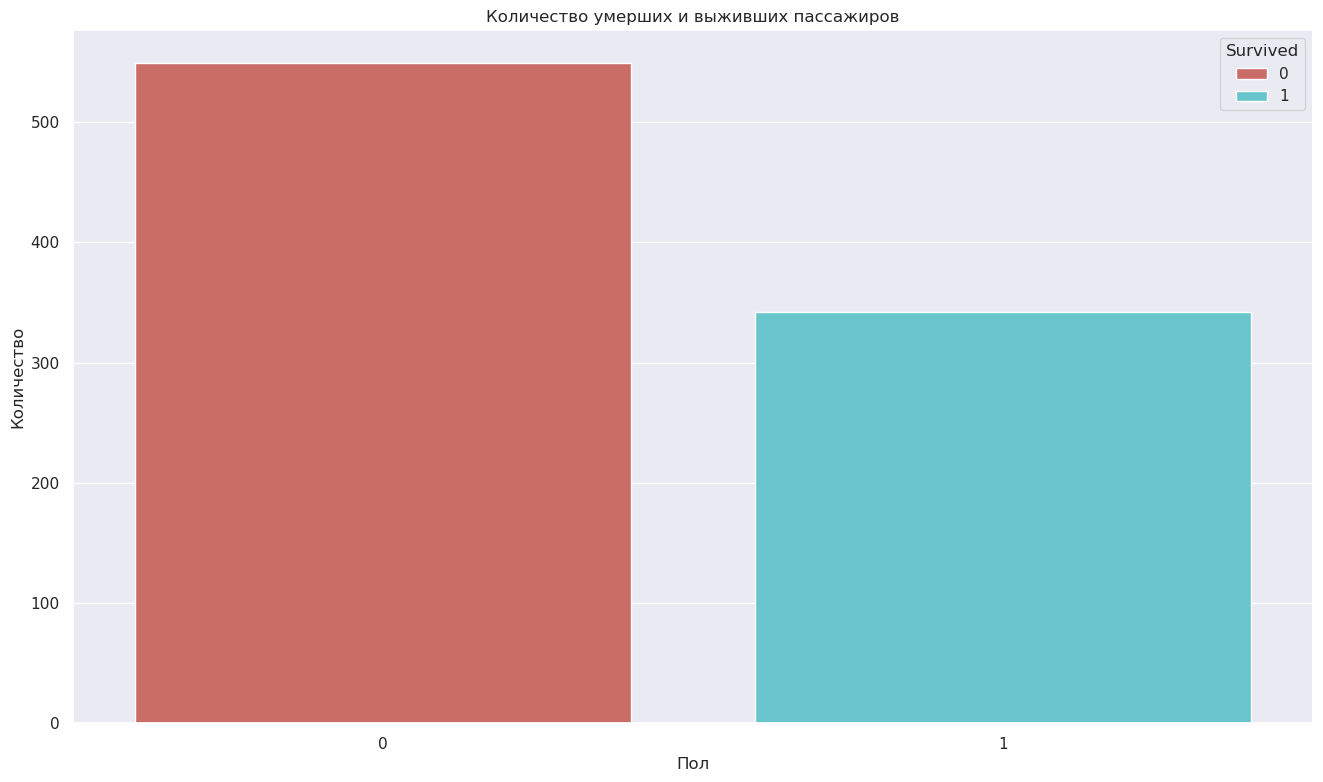

Survived: 342
Dead: 549
Survived / Dead: 1.61


In [12]:
ax = make_plot("Пол", "Количество", "Количество умерших и выживших пассажиров")[1]
sns.countplot(data=df, x='Survived', hue='Survived', ax=ax, palette='hls')
plt.show()

print(f"Survived: {len(df[df['Survived'] == 1])}")
print(f"Dead: {len(df[df['Survived'] == 0])}")
print(f"Survived / Dead: {len(df[df['Survived'] == 0]) / len(df[df['Survived'] == 1]):.2f}")

- Умерло больше, чем выжило примерно в 1.84 раза

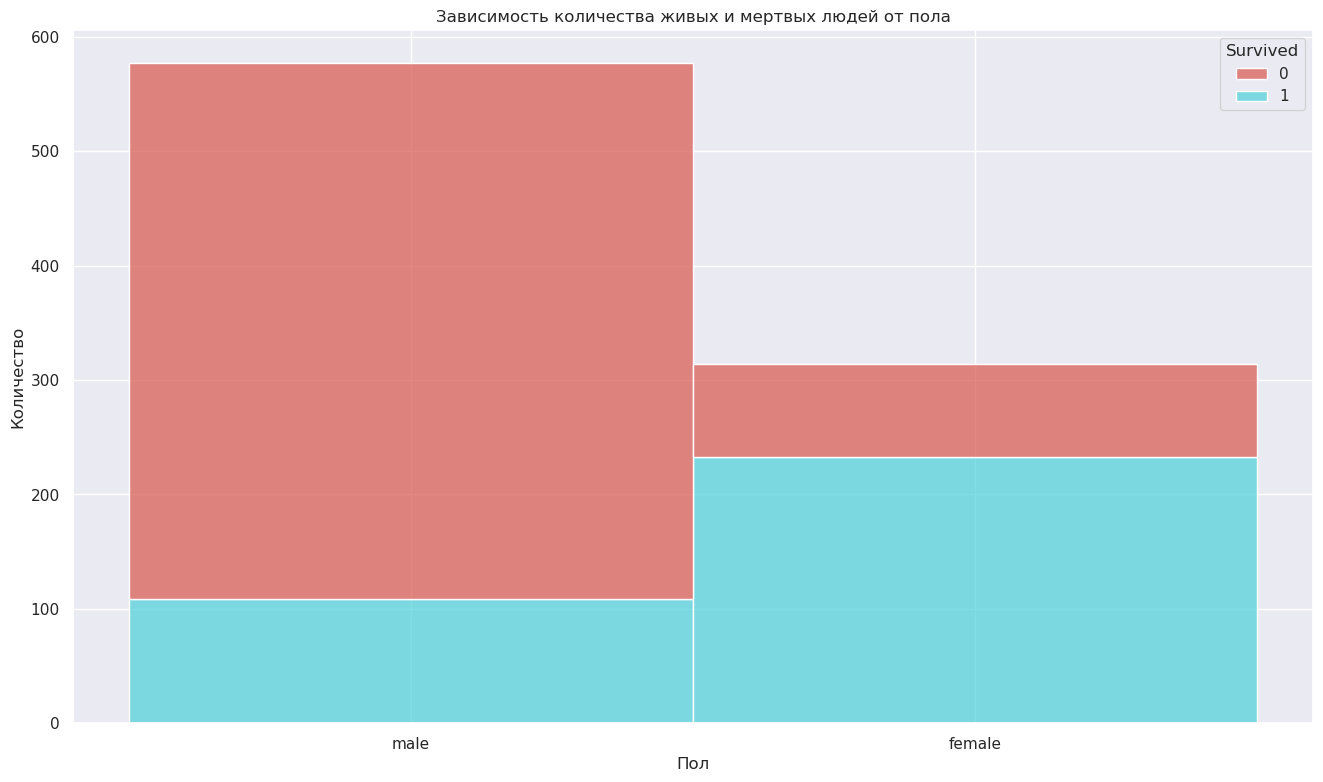

Male survived: 109
Female survived: 233
Male dead: 468
Female dead: 81
Male survival coefficient: 0.19
Female survival coefficient: 0.74


In [13]:
ax = make_plot("Пол", "Количество",
               "Зависимость количества живых и мертвых людей от пола")[1]
sns.histplot(data=df, x='Sex', hue='Survived', multiple='stack', palette='hls', ax=ax)
plt.show()

print(f"Male survived: {len(df[(df['Survived'] == 1) & (df['Sex'] == 'male')])}")
print(f"Female survived: {len(df[(df['Survived'] == 1) & (df['Sex'] == 'female')])}")
print(f"Male dead: {len(df[(df['Survived'] == 0) & (df['Sex'] == 'male')])}")
print(f"Female dead: {len(df[(df['Survived'] == 0) & (df['Sex'] == 'female')])}")

print(
    f"Male survival coefficient: {len(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]) / len(df[df['Sex'] == 'male']):.2f}")
print(
    f"Female survival coefficient: {len(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]) / len(df[df['Sex'] == 'female']):.2f}")

- Женщины и правда выживали сильно чаще, чем мужчины

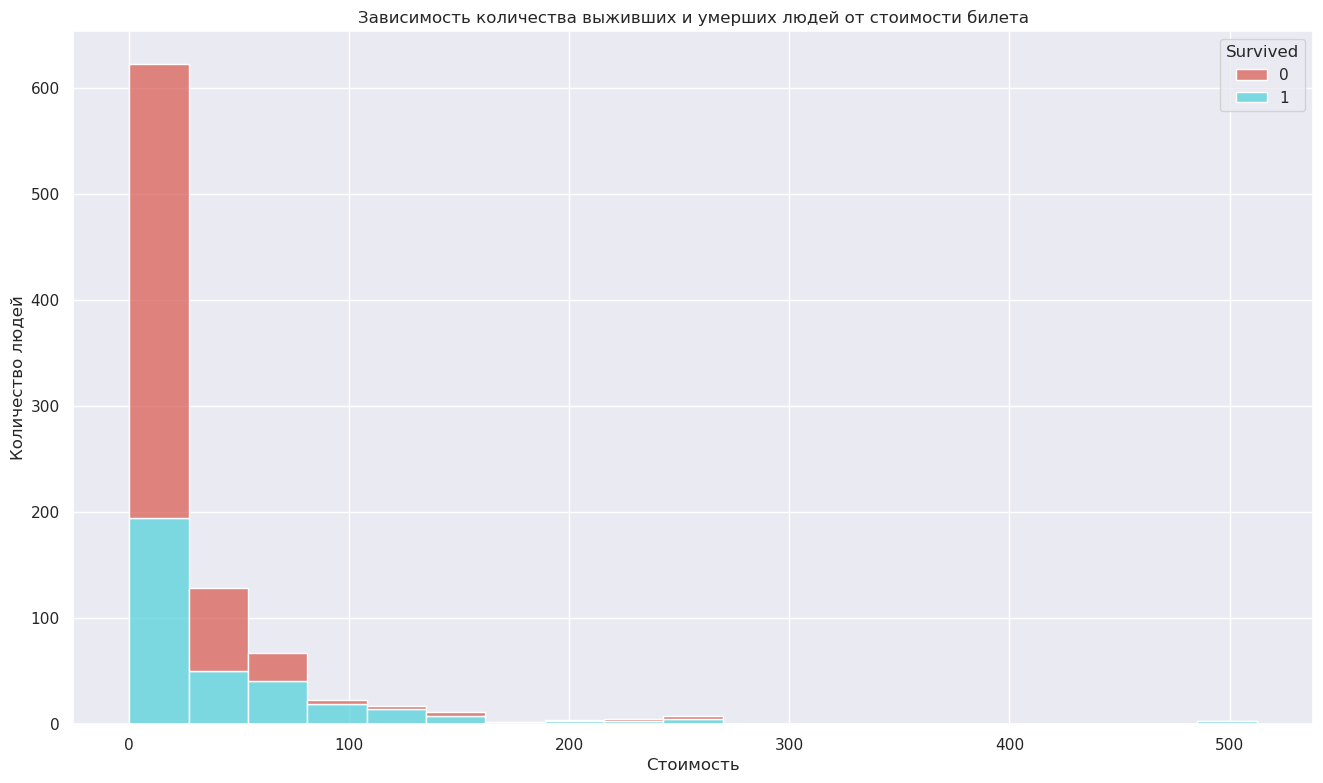

In [14]:
ax = make_plot("Стоимость", "Количество людей", "Зависимость количества выживших и умерших людей от стоимости билета",
               ['Выжили', 'Умерли'])[1]
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', palette='hls',
             bins=np.linspace(0, np.max(df['Fare']), 20), ax=ax)
plt.show()

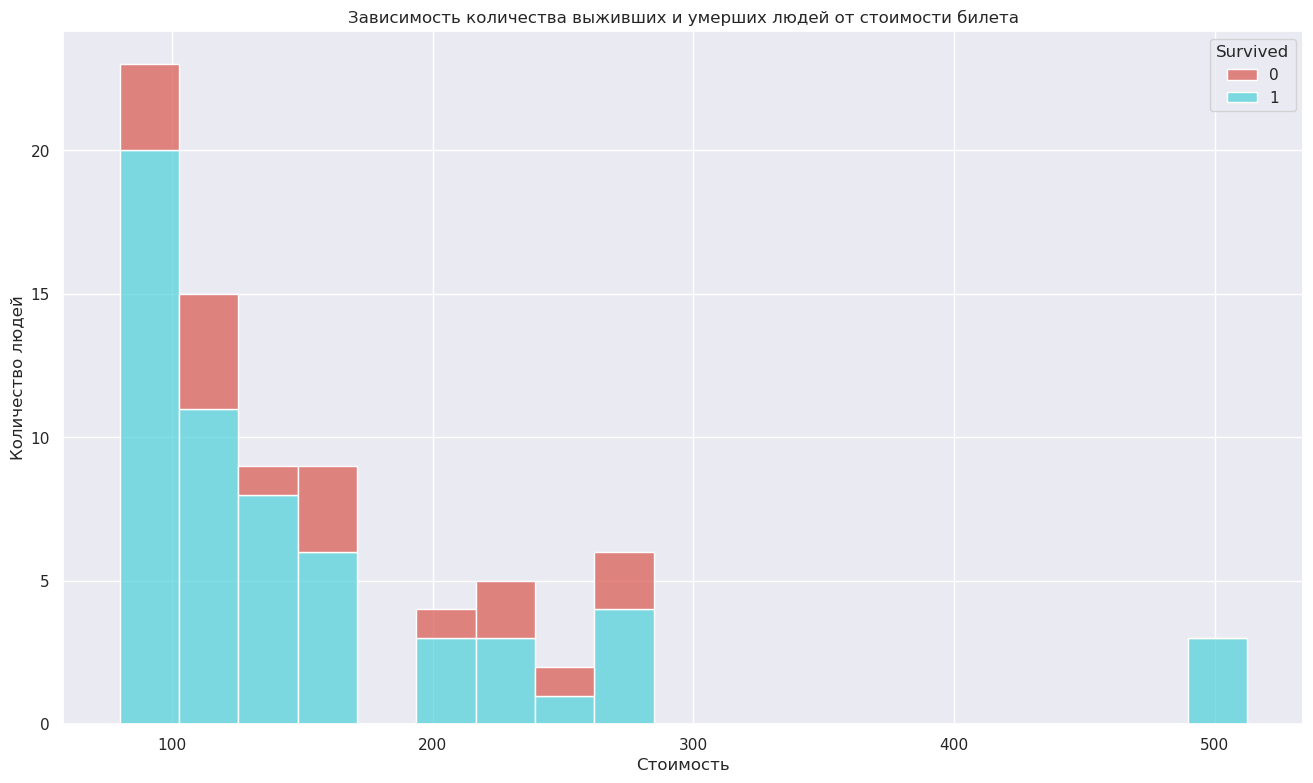

In [15]:
ax = make_plot("Стоимость", "Количество людей", "Зависимость количества выживших и умерших людей от стоимости билета",
               ['Выжили', 'Умерли'])[1]
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', palette='hls',
             bins=np.linspace(80, np.max(df['Fare']), 20), ax=ax)
plt.show()

Первый график - количество выживших и умерших для всех стоимостей билетов, второй - для более дорогих билетов. Как мы видим, люди с более дешевыми выживали ощутимо меньше, чем люди с дорогими (в относительном соотношении с учетом их количества).

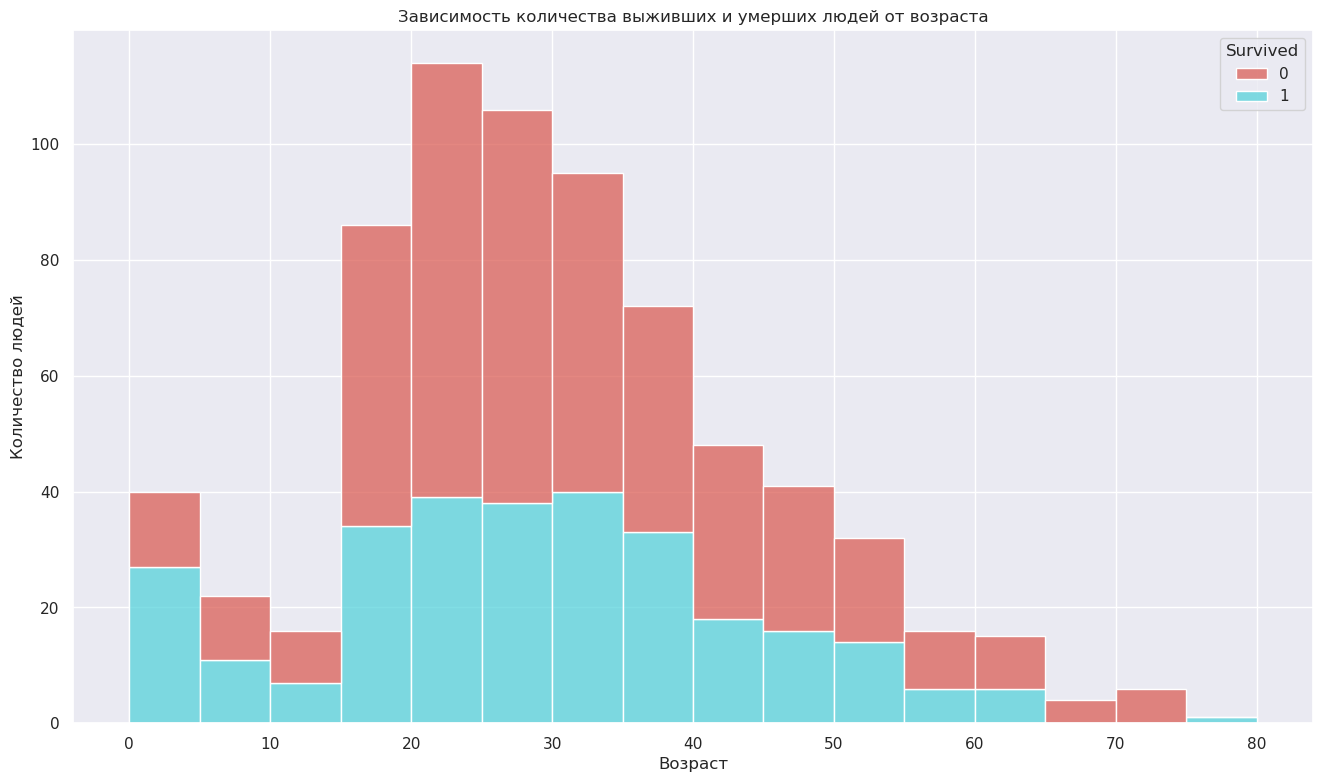

In [16]:
ax = make_plot("Возраст", "Количество людей", "Зависимость количества выживших и умерших людей от возраста",
               ['Выжил', 'Умер'])[1]
plot_age_gistogram = sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='hls',
                                  bins=np.linspace(0, 80, 17), ax=ax)
plt.show()

Из графика мы можем сделать вывод, что наименьшая смертность у младенцев (исходя из высот гистограмм и графика).

__Задание 7 (1 балл):__ Часто в значениях признаков встречаются пропуски, многие методы машинного обучения не умеют работать с такими данными. Найти все признаки с пропусками в наборе данных, предложить минимум два способа борьбы с пропусками, указать достоинства и недостатки каждого, применить эти методы к данным.

Первый способ - выкинуть все данные с пропусками из интересующих нас колонок. Преимущество в простоте реализации и то, что нам не требуется более рассматривать неизвестные для нас значения. Недостатки - теряем часть данных и информации и можем получить смещение в выборке, если данных для какого-то определенного типа людей отсутствовало больше (например людей из какого-то класса обслуживания).

In [17]:
print("Data size before dropping:", df.shape)
df_c = df.dropna()
print("Data size after dropping:", df_c.shape)

Data size before dropping: (891, 11)
Data size after dropping: (183, 11)


In [18]:
features_columns = ['Pclass', 'Sex', 'Age', 'Fare']
df_featured = df[features_columns]

print("Data size before dropping:", df_featured.shape)
df_featured_c = df_featured.dropna()
print("Data size after dropping:", df_featured_c.shape)


Data size before dropping: (891, 4)
Data size after dropping: (714, 4)


Уже сильно лучше, мы выкинули сильно меньше данных, такой метод приемлем

Просто так удалить все строки с недостатком данных нельзя, выкидываем большую часть данных. Рассмотрим наиболее важные для нас признаки: пол, возраст, класс обслуживания, стоимость билета, и попробуем произвести удаление для них.

Второй метод - пропущенные значения заменяются на определённое значение, например, медиану (для числовых признаков) или наиболее часто встречающееся значение (для категориальных признаков). Плюсы: все данные сохраняются, мы ничего не теряем. Но стоит учитывать, что мы таким образом можем внести систематическую ошибку в данные, ведь пропущенными могли быть данные какого-то определенного типа. Если какой-то признак с пропусками зависел от другого (как я уже говорил, допустим были пропущены стоимости билетов для людей из третьего класса, то, заменив на среднее по всем стоимостям по всем классам, мы внесем ощутимый сдвиг.

In [19]:
from sklearn.impute import SimpleImputer

df_r = df.copy()

numeric_cols = df_r.select_dtypes(include=['int64', 'float64']).columns
imputer_num = SimpleImputer(strategy='median')
df_r[numeric_cols] = imputer_num.fit_transform(df_r[numeric_cols])

categorical_cols = df_r.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_r[categorical_cols] = imputer_cat.fit_transform(df_r[categorical_cols])

df_rc = df_r.dropna()
print("Data size after replacing:", df_rc.shape)

Data size after replacing: (891, 11)


__Задание 8 (0.5 балла):__ Отобразить гистограмму распределения возрастов для каждого класса пассажиров. В результате должно получиться три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Стоит обратить внимание на параметры `figsize`, `sharey`, `sharex` функции `plt.subplots`. Также полезными могут оказаться параметры `bins` и `normed` функции `plt.hist`.

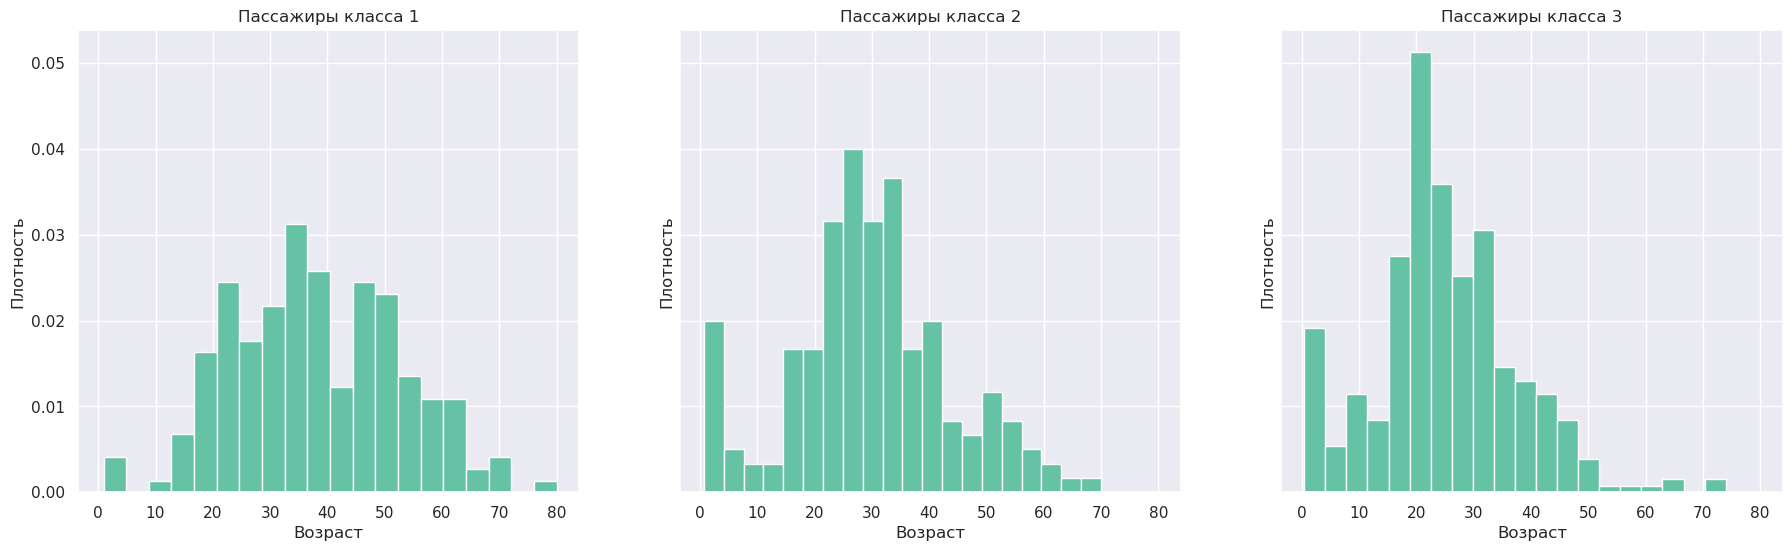

In [20]:
axs = plt.subplots(1, 3, figsize=(22, 6), sharex=True, sharey=True)[1]

for ax, pclass in zip(axs, classes):
    ages = df[df['Pclass'] == pclass]['Age'].dropna()
    ax.hist(ages, bins=20, density=True)
    ax.set_title(f'Пассажиры класса {pclass}')
    ax.set_xlabel('Возраст')
    ax.set_ylabel('Плотность')

plt.show()

Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [21]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_id', 'label_name'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 9 (0.5 балл):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [22]:
data_joined = data.merge(label_names, on='label_id', how='left')
data_joined = data_joined.drop(columns=['label_id'])

data_joined.head(10)

,text,is_train,label_name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,True,talk.politics.guns
6,From: bmdelane@quads.uchicago.edu (brian manni...,True,sci.med
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,True,comp.sys.ibm.pc.hardware
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,True,comp.os.ms-windows.misc
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,True,comp.sys.mac.hardware


In [23]:
print("Train size:", data_joined['is_train'].sum())
print("Test size:", len(data_joined) - data_joined['is_train'].sum())

Train size: 11314
Test size: 7532


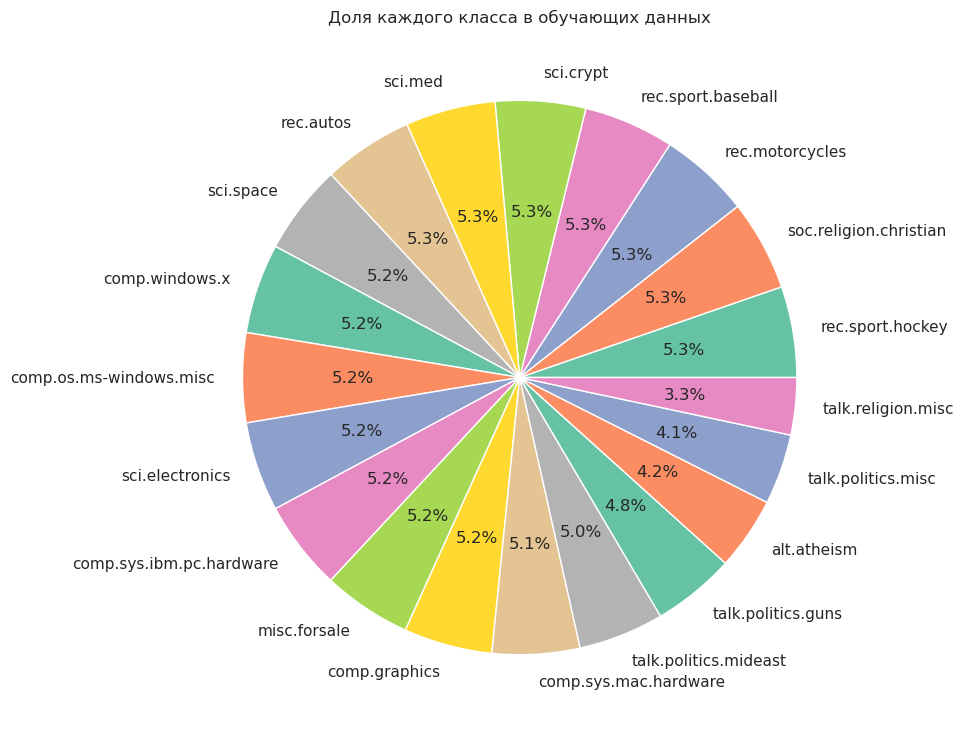

In [24]:
class_counts = data_joined[data_joined['is_train'] == True]['label_name'].value_counts()

ax = make_plot("", "", "Доля каждого класса в обучающих данных")[1]
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.show()

__Задание 10 (2 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [25]:
non_alpha_re = re.compile(r'[^a-z]')


def preprocess(text):
    text = text.lower()
    text = text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    text = non_alpha_re.sub(' ', text)
    words = text.split()
    return words

In [26]:
data_joined['parsed_text'] = data_joined['text'].apply(preprocess)
data_joined.head(10)

,text,is_train,label_name,parsed_text
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,rec.autos,"[from, lerxst, wam, umd, edu, where, s, my, th..."
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,comp.sys.mac.hardware,"[from, guykuo, carson, u, washington, edu, guy..."
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,comp.sys.mac.hardware,"[from, twillis, ec, ecn, purdue, edu, thomas, ..."
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,comp.graphics,"[from, jgreen, amber, joe, green, subject, re,..."
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,sci.space,"[from, jcm, head, cfa, harvard, edu, jonathan,..."
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,True,talk.politics.guns,"[from, dfo, vttoulu, tko, vtt, fi, foxvog, dou..."
6,From: bmdelane@quads.uchicago.edu (brian manni...,True,sci.med,"[from, bmdelane, quads, uchicago, edu, brian, ..."
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,True,comp.sys.ibm.pc.hardware,"[from, bgrubb, dante, nmsu, edu, grubb, subjec..."
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,True,comp.os.ms-windows.misc,"[from, holmes, iscsvax, uni, edu, subject, win..."
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,True,comp.sys.mac.hardware,"[from, kerr, ux, cso, uiuc, edu, stan, kerr, s..."


__Задание 11 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите график (plot) частот встречаемости слов в обучающей коллекции,
отсортировав слова по убыванию частоты встречаемости (по оси X идут индексы из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот, вывести нужно график для всего словаря, сами слова подписывать не нужно).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

Датасет слишком большой, гистограмма строится долго, потому использовал обычный график, который является не менее информативным в данном случае

Before filtering

Unique words: 115065


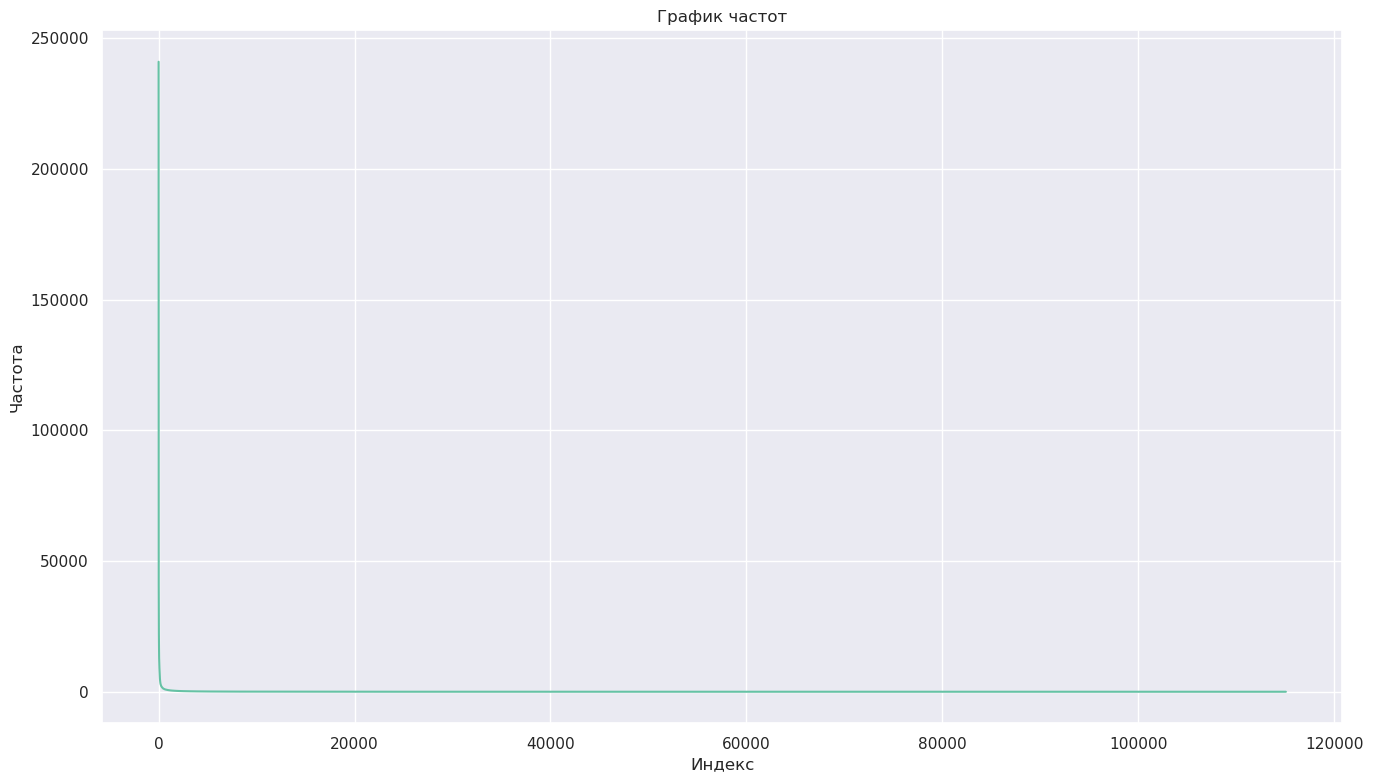

After filtering

Unique words: 51551


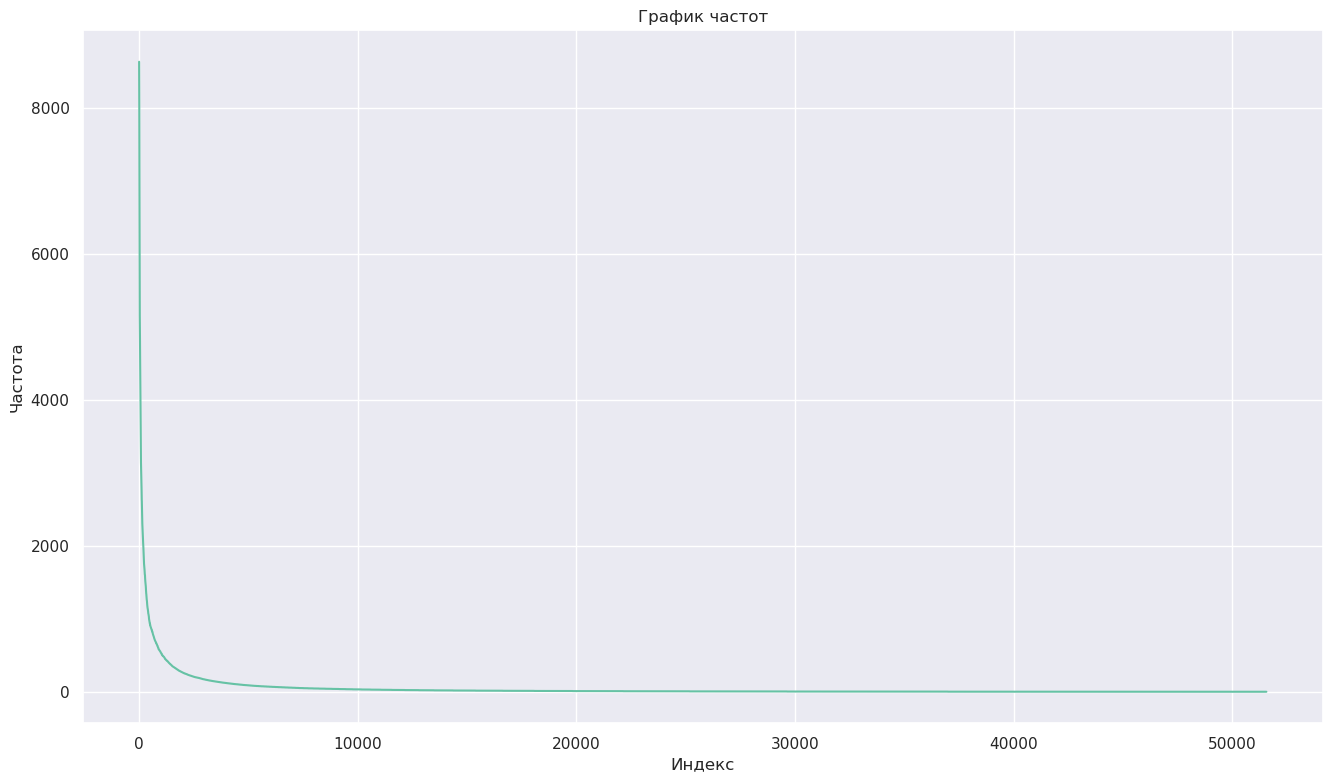

In [27]:
from collections import Counter


def vis_vocab(frame):
    vocabulary = Counter()
    for words in frame['parsed_text']:
        vocabulary.update(words)

    print("Unique words:", len(vocabulary))

    frequencies = [freq for word, freq in vocabulary.most_common()]

    plot = make_plot("Индекс", "Частота", "График частот")[1]
    plot.plot(range(len(frequencies)), frequencies)
    plt.show()

    return vocabulary


print("Before filtering\n")
voc = vis_vocab(data_joined)

filtered_vocab = Counter({word: count for word, count in voc.items()
                          if (3 <= count <= 9000)
                          and (3 <= len(word) <= 20)
                          and (len(set(word)) > 1)})
allowed_words = set(filtered_vocab.keys())

data_c = data_joined.copy()
data_c['parsed_text'] = data_c['parsed_text'].apply(lambda word: [w for w in word if w in allowed_words])

print("After filtering\n")
voc = vis_vocab(data_c)

Распределение после фильтрации выглядит ощутимо лучше

__Задание 12 (1 балл):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data_c['parsed_str'] = data_c['parsed_text'].apply(lambda tokens: " ".join(tokens))

train_features = data_c[data_c['is_train'] == True]['parsed_str']
test_features = data_c[data_c['is_train'] == False]['parsed_str']

vocab_map = {word: idx for idx, word in enumerate(voc.keys())}
vectorizer = CountVectorizer(vocabulary=vocab_map)
X_train = vectorizer.fit_transform(train_features).toarray()
X_test = vectorizer.transform(test_features).toarray()
y_train = data[data['is_train'] == True]['label_id'].values
y_test = data[data['is_train'] == False]['label_id'].values

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

assert len(vectorizer.vocabulary_) == len(vocab_map)

Train size: (11314, 51551)
Test size: (7532, 51551)


__Задание 13 (4 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

Дополнительно попробуйте преобразовать разреженные данные мешка слов в плотные векторы разных размеров (10-50-100-200-500) с помощью SVD-разложения и оценить качество обучения модели на них.

Все результаты замеров отобразить в виде графиков и/или таблиц.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

lr = LogisticRegression(max_iter=500)
grid = GridSearchCV(lr, param_grid, cv=5, verbose=4, scoring='accuracy', n_jobs=8)
grid.fit(X_train, y_train)

best_C = grid.best_params_['C']

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 5/5] END ............................C=0.01;, score=0.870 total time= 5.2min
[CV 3/5] END ............................C=0.01;, score=0.866 total time= 5.4min
[CV 2/5] END ............................C=0.01;, score=0.871 total time= 5.9min
[CV 2/5] END .............................C=0.1;, score=0.893 total time= 5.9min
[CV 4/5] END ............................C=0.01;, score=0.873 total time= 6.0min
[CV 1/5] END .............................C=0.1;, score=0.884 total time= 6.0min
[CV 1/5] END ............................C=0.01;, score=0.864 total time= 6.4min
[CV 3/5] END .............................C=0.1;, score=0.884 total time= 6.4min
[CV 5/5] END .............................C=0.1;, score=0.890 total time= 5.6min
[CV 4/5] END .............................C=0.1;, score=0.885 total time= 5.9min
[CV 1/5] END ..............................C=10;, score=0.875 total time= 5.6min
[CV 3/5] END ...............................C=1;,

In [39]:
y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("---- Without SVD ----")
print(f"--> Best C:    {best_C}         ")
print(f"--> Accuracy:  {accuracy:.3f}   ")
print(f"--> F1 micro:  {f1_micro:.3f}   ")
print(f"--> F1 macro:  {f1_macro:.3f}   ")

---- Without SVD ----
--> Best C:    1         
--> Accuracy:  0.795   
--> F1 micro:  0.795   
--> F1 macro:  0.789   


In [40]:
from tqdm import tqdm

dimensions = [10, 50, 100, 200, 500]
svd_results = []

for n_components in tqdm(dimensions):
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_train_svd = svd.fit_transform(X_train)
    X_test_svd = svd.transform(X_test)

    lr_svd = LogisticRegression(C=best_C, max_iter=500)
    lr_svd.fit(X_train_svd, y_train)
    y_pred_svd = lr_svd.predict(X_test_svd)

    acc_svd = accuracy_score(y_test, y_pred_svd)
    f1_micro_svd = f1_score(y_test, y_pred_svd, average='micro')
    f1_macro_svd = f1_score(y_test, y_pred_svd, average='macro')

    svd_results.append({
        'n_components': n_components,
        'accuracy': acc_svd,
        'f1_micro': f1_micro_svd,
        'f1_macro': f1_macro_svd
    })

100%|██████████| 5/5 [02:43<00:00, 32.69s/it]



Performance with SVD-transformed Data:
   n_components  accuracy  f1_micro  f1_macro
0            10  0.345990  0.345990  0.324630
1            50  0.575146  0.575146  0.562841
2           100  0.640467  0.640467  0.630715
3           200  0.684811  0.684811  0.676839
4           500  0.723579  0.723579  0.717190


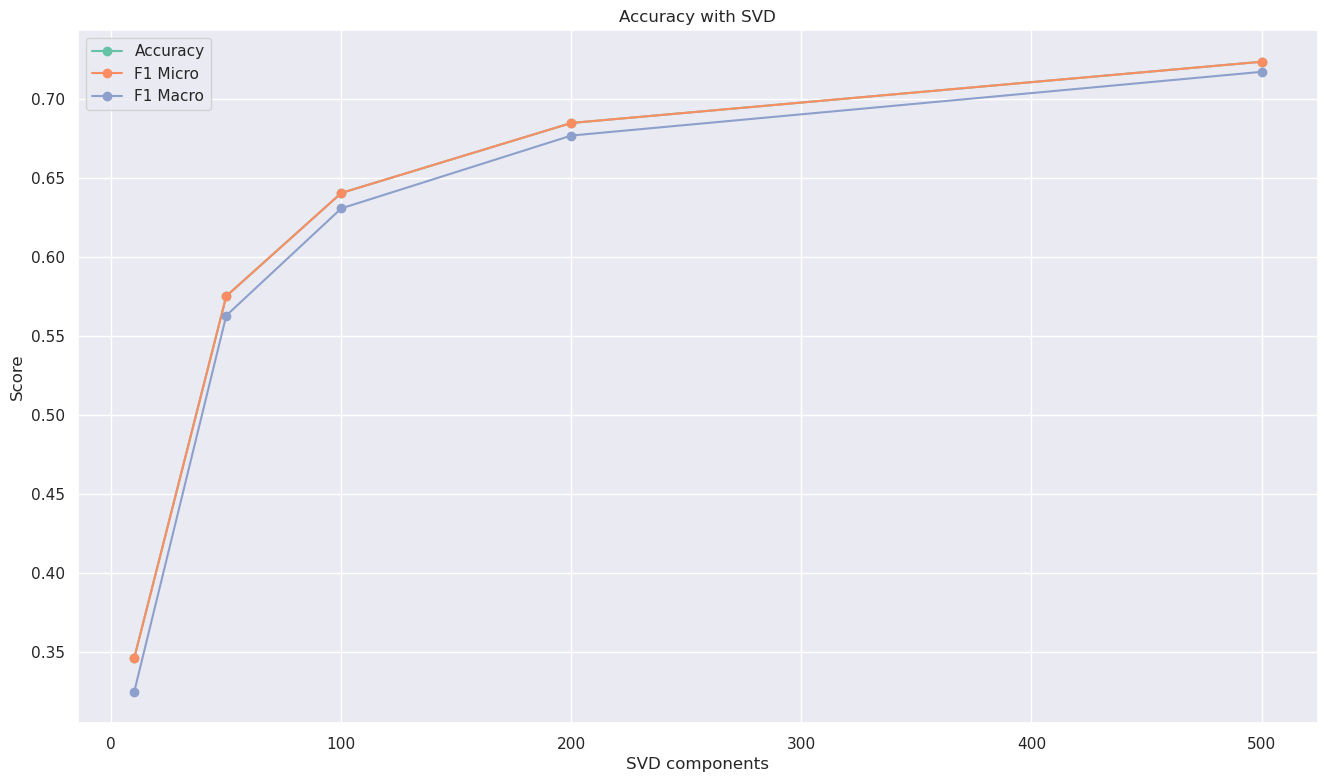

In [41]:
results_df = pd.DataFrame(svd_results)
print("\nPerformance with SVD-transformed Data:")
print(results_df)

ax = make_plot("SVD components", "Score", "Accuracy with SVD")[1]
ax.plot(results_df['n_components'], results_df['accuracy'], marker='o', label='Accuracy')
ax.plot(results_df['n_components'], results_df['f1_micro'], marker='o', label='F1 Micro')
ax.plot(results_df['n_components'], results_df['f1_macro'], marker='o', label='F1 Macro')
plt.legend()
plt.show()

Лучшие результаты получались без SVD, но требовали большие вычислительные мощности

__Задание 14 (1 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

### plot_confusion_matrix is deprecated

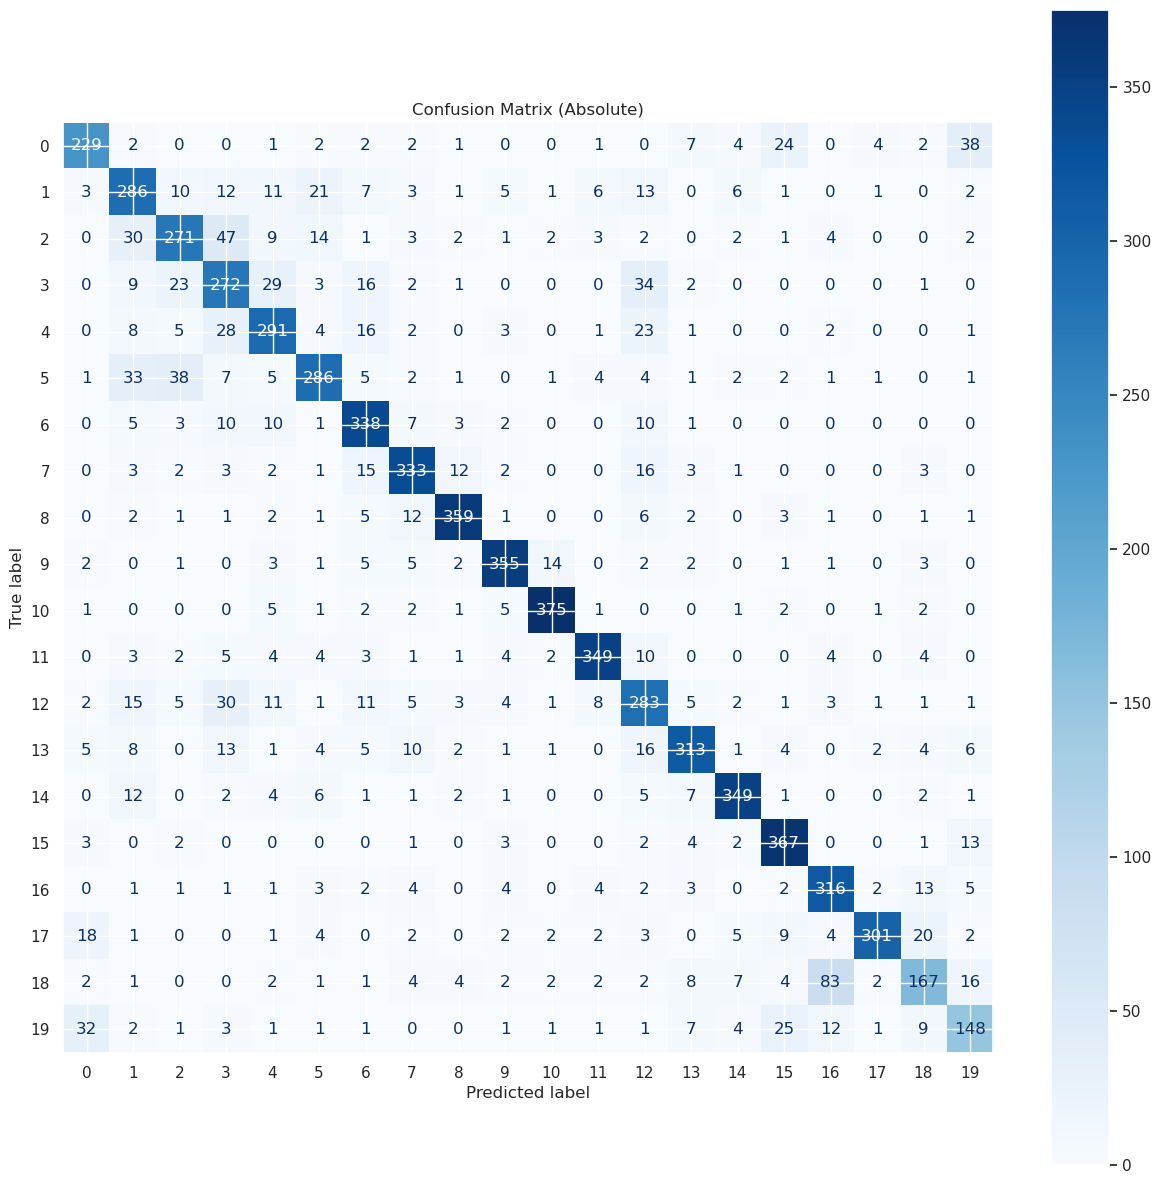

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

ax = make_plot("", "", "Confusion Matrix (Absolute)", figsize=(15, 15))[1]
disp_abs = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp_abs.plot(ax=ax, cmap='Blues', values_format='d')
plt.show()

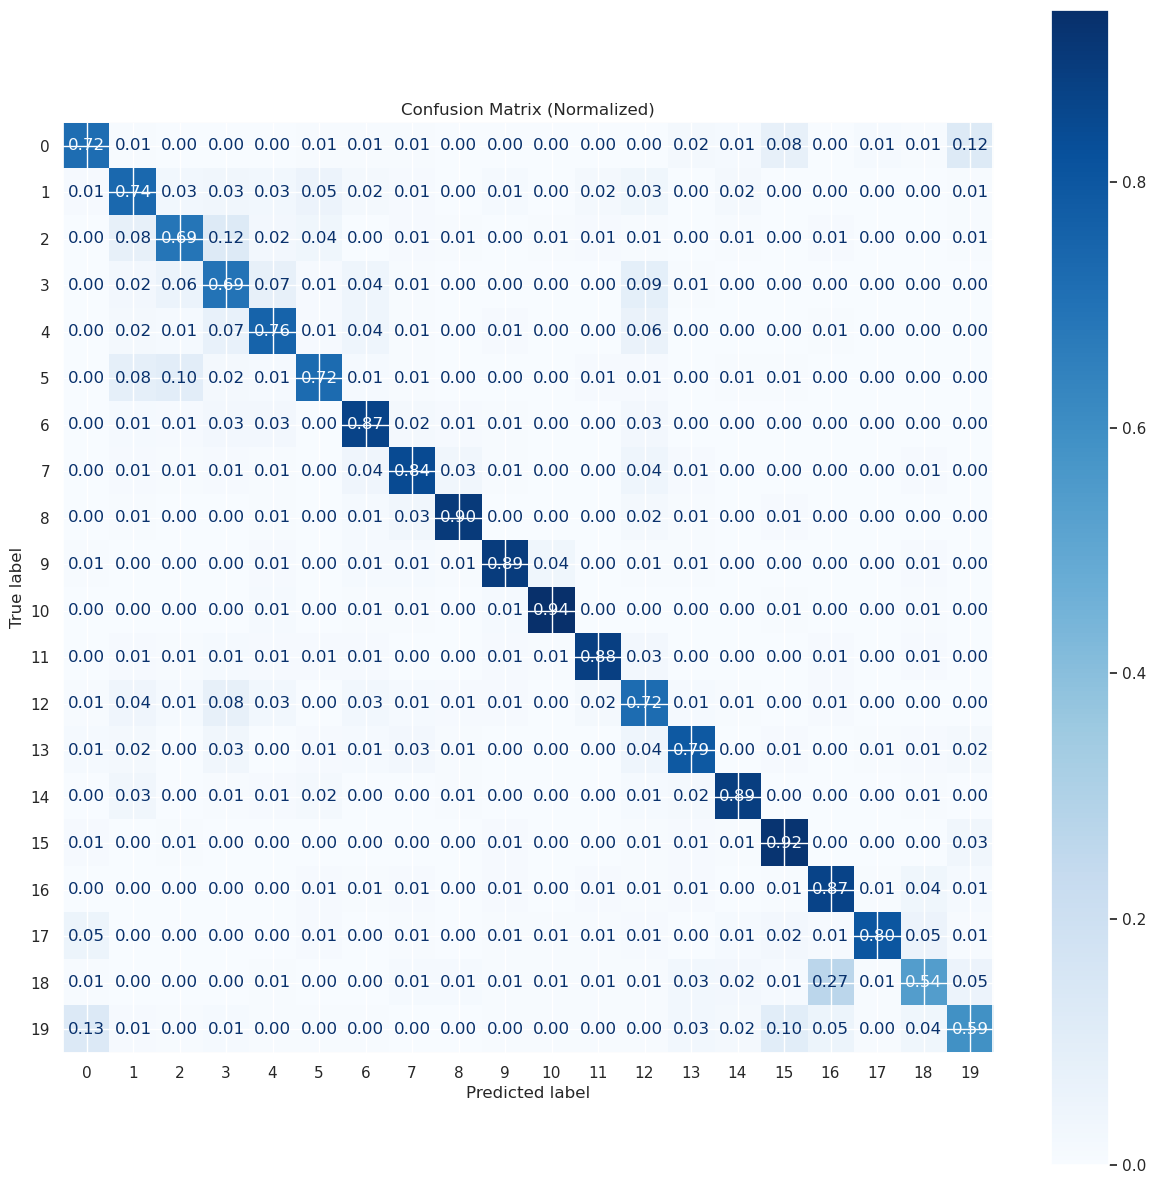

In [52]:
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

ax = make_plot("", "", "Confusion Matrix (Normalized)", figsize=(15, 15))[1]
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
disp_norm.plot(ax=ax, cmap='Blues', values_format='.2f')
plt.show()

In [ ]:
cm_no_diag = conf_matrix.copy()
np.fill_diagonal(cm_no_diag, 0)

max_confusion = cm_no_diag.max()
confused_pairs = np.argwhere(cm_no_diag == max_confusion)

print("Max number of errors between pairs of classes: ", max_confusion)
print("Classes that have been confused most: ")
for i, j in confused_pairs:
    print(f"--> {i} with {j}: {max_confusion} times")

Max number of errors between pairs of classes:  83
Classes that have been confused most: 
--> 18 with 16: 83 times


__Задание 15 (2 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_clf = XGBClassifier()
grid = GridSearchCV(xgb_clf, param_grid, scoring='accuracy', cv=5, n_jobs=8, verbose=4)
grid.fit(X_train, y_train)

best_params = grid.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.703 total time=24.0min
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.706 total time=24.0min
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.681 total time=24.1min
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.684 total time=24.5min
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.696 total time=24.6min
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.711 total time=48.0min
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.721 total time=48.3min
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.726 total time=48.6min


KeyboardInterrupt: 

In [ ]:
y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("---- XGBoost ----")
print(f"--> Best params: {best_params}")
print(f"--> Accuracy:  {accuracy:.3f}   ")
print(f"--> F1 micro:  {f1_micro:.3f}   ")
print(f"--> F1 macro:  {f1_macro:.3f}   ")